## 数据预处理

In [1]:
# -*- coding: UTF-8 -*-


from pathlib import Path  # 导入路径模块
import numpy as np  #引入numpy库
import matplotlib.pyplot as plt  #引入绘图库
import collections
import re  #引入字符串匹配库
from tqdm import tqdm  #引入进度条库
from nltk import word_tokenize  # 分词
from nltk.corpus import stopwords  # 停用词(情态动词should，etc)
from nltk.stem.porter import PorterStemmer  # 使用Porter词干提取方法
#常用词干提取，删除英语中单词前后缀和复数s
from nltk.stem import WordNetLemmatizer  # 词性还原归并，同一词根一视同仁

config = {  #基本格式设置
    "font.family": 'serif', # 衬线字体
    "figure.figsize": (14, 6),  # 图像大小
    "font.size": 20, # 字号大小
    "font.serif": ['SimSun'], # 宋体
    "mathtext.fontset": 'stix', # 渲染数学公式字体
    'axes.unicode_minus': False # 显示负号
}
plt.rcParams.update(config)  #设置绘图参数

In [106]:
def extractWords(words):  # 提取分词
    words = words.lower()  # 转化为小写
    words = word_tokenize(words)  # 分词
    dropWords = ["n't"]  # 这个是计算结果中出现次数第一的，但明显不重要
    words = [word for word in words if re.match(r'[A-Za-z]', word) and word not in dropWords] #保证单词中必须包含字母
    stops = set(stopwords.words('english'))  # 停用词
    words = [word for word in words if word not in stops]
    tmp = []  # 词干提取+还原词性
    for word in words:
        stem = PorterStemmer().stem(word)  # 词干提取
        pos = ['n', 'v', 'a', 'r', 's']  # 名词，动词，形容词，副词，附属形容词
        for p in pos:
            stem = WordNetLemmatizer().lemmatize(stem, pos=p)
        tmp.append(stem)  # 还原词性
    words = tmp
    return words

def initDataset(fname, showInfo=True): #读入数据集
    path = Path(fname)  # 将路径转化为Path类
    folds = [f.name for f in path.iterdir() if f.is_dir()]  # 获取文件夹名称
    allwords, words, fileNum, counter = [[] for _ in range(20)], [[] for _ in range(20)], [], []
    for id, fold in enumerate(folds):  # 一共有20个文件夹，分别对其内部文件进行处理
        print(f'处理第{id+1}/{len(folds)}个文件夹{fold}中...')
        now = path.joinpath(fold)
        files = [f.name for f in now.iterdir() if f.is_file()]  # 获取当前文件夹内的文件名
        for file in tqdm(files):  # 获取文件文件名
            pathFile = now.joinpath(file)
            with open(pathFile, errors='replace') as f:  # 打开文件进行处理
                s = f.readline()
                while s != "\n":  # 先找到第一个换行符，下面则是正文
                    s = f.readline()
                text = f.read() 
            allwords[id] += extractWords(text)
            words[id].append(extractWords(text))
        fileNum.append(len(files))  # 记录文件数目
        counter.append(collections.Counter(allwords[id]))  # 统计词频
        
    totalCounter = collections.Counter([w for word in allwords for w in word])
    if showInfo:  # 可视化文件信息效果
        print(f'{"Class":>25} {"Id":>5} {"Files":>8} {"Words":>8}  {"Most common words"}')  # 显示文件相关信息
        for i, fold in enumerate(folds):
            print(f'{fold:>25}:{i:>5} {fileNum[i]:>8} {len(counter[i]):>8}  {[t[0] for t in counter[i].most_common(5)]}')
        print(f'{"":>25} {"":>5} {sum(fileNum):>8} {len(totalCounter):>8}  {[t[0] for t in totalCounter.most_common(5)]}')
    
    return words, totalCounter


In [165]:
text,_=initDataset(r'E:\software\jupyter notebook\data\data1')

处理第1/1个文件夹type1中...


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31.33it/s]

                    Class    Id    Files    Words  Most common words
                    type1:    0        1      122  ['present', 'scientif', 'visual', 'virtual', 'realiti']
                                       1      122  ['present', 'scientif', 'visual', 'virtual', 'realiti']


In [169]:
text

[[['call',
   'present',
   'navi',
   'scientif',
   'visual',
   'virtual',
   'realiti',
   'seminar',
   'tuesday',
   'june',
   'carderock',
   'divis',
   'naval',
   'surfac',
   'warfar',
   'center',
   'formerli',
   'david',
   'taylor',
   'research',
   'center',
   'bethesda',
   'maryland',
   'sponsor',
   'ness',
   'navi',
   'engin',
   'softwar',
   'system',
   'sponsor',
   'one-day',
   'navi',
   'scientif',
   'visual',
   'virtual',
   'realiti',
   'seminar',
   'purpos',
   'seminar',
   'present',
   'exchang',
   'inform',
   'navy-rel',
   'scientif',
   'visual',
   'virtual',
   'realiti',
   'program',
   'research',
   'develop',
   'applic',
   'present',
   'present',
   'solicit',
   'aspect',
   'navy-rel',
   'scientif',
   'visual',
   'virtual',
   'realiti',
   'current',
   'work',
   'works-in-progress',
   'propos',
   'work',
   'navi',
   'organ',
   'consid',
   'four',
   'type',
   'present',
   'avail',
   'regular',
   'present',
  

In [3]:
tmp = extractWords("if not os.path.exists(file_name):\
    ew = pd.ExcelWriter(file_name)\
    data.to_excel(ew,sheet_name = 'sheet1')\
    ew.save()")
tmp

['os.path.exist',
 'file_nam',
 'ew',
 'pd.excelwrit',
 'file_nam',
 'data.to_excel',
 'ew',
 'sheet_nam',
 'ew.sav']

In [4]:
counter = collections.Counter(tmp)
counter

Counter({'os.path.exist': 1,
         'file_nam': 2,
         'ew': 2,
         'pd.excelwrit': 1,
         'data.to_excel': 1,
         'sheet_nam': 1,
         'ew.sav': 1})

In [5]:
counter['ew'] += 1
counter

Counter({'os.path.exist': 1,
         'file_nam': 2,
         'ew': 3,
         'pd.excelwrit': 1,
         'data.to_excel': 1,
         'sheet_nam': 1,
         'ew.sav': 1})

In [6]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [7]:
# 测试下词性转化功能
print(WordNetLemmatizer().lemmatize('get', pos='v'), WordNetLemmatizer().lemmatize('got', pos='v'), WordNetLemmatizer().lemmatize('gotten', pos='v'))
print(WordNetLemmatizer().lemmatize('dog', pos='n'), WordNetLemmatizer().lemmatize('dogs', pos='n'))

get get get
dog dog


In [8]:
words, totalCounter = initDataset(r'E:\software\jupyter notebook\data\20_newsgroups')  # 此处设置为数据集位置

处理第1/20个文件夹alt.atheism中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 54.94it/s]


处理第2/20个文件夹comp.graphics中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 65.63it/s]


处理第3/20个文件夹comp.os.ms-windows.misc中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 50.64it/s]


处理第4/20个文件夹comp.sys.ibm.pc.hardware中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 82.58it/s]


处理第5/20个文件夹comp.sys.mac.hardware中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.73it/s]


处理第6/20个文件夹comp.windows.x中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.12it/s]


处理第7/20个文件夹misc.forsale中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 98.00it/s]


处理第8/20个文件夹rec.autos中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 77.48it/s]


处理第9/20个文件夹rec.motorcycles中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 81.28it/s]


处理第10/20个文件夹rec.sport.baseball中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 74.74it/s]


处理第11/20个文件夹rec.sport.hockey中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.49it/s]


处理第12/20个文件夹sci.crypt中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 54.43it/s]


处理第13/20个文件夹sci.electronics中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 78.42it/s]


处理第14/20个文件夹sci.med中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.91it/s]


处理第15/20个文件夹sci.space中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.55it/s]


处理第16/20个文件夹soc.religion.christian中...


100%|████████████████████████████████████████████████████████████████████████████████| 997/997 [00:19<00:00, 51.13it/s]


处理第17/20个文件夹talk.politics.guns中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 54.61it/s]


处理第18/20个文件夹talk.politics.mideast中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:25<00:00, 39.32it/s]


处理第19/20个文件夹talk.politics.misc中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:21<00:00, 47.40it/s]


处理第20/20个文件夹talk.religion.misc中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.43it/s]


                    Class    Id    Files    Words  Most common words
              alt.atheism:    0     1000    10950  ['write', 'say', 'one', 'god', 'would']
            comp.graphics:    1     1000    13406  ['imag', 'file', 'use', 'program', 'write']
  comp.os.ms-windows.misc:    2     1000    48850  ['max', 'g', 'r', 'q', 'p']
 comp.sys.ibm.pc.hardware:    3     1000    10353  ['drive', 'use', 'get', 'card', 'scsi']
    comp.sys.mac.hardware:    4     1000     9354  ['use', 'mac', 'get', 'write', 'appl']
           comp.windows.x:    5     1000    20392  ['x', 'use', 'window', 'file', 'program']
             misc.forsale:    6     1000    10830  ['new', 'sale', 'offer', 'use', 'sell']
                rec.autos:    7     1000    10378  ['car', 'write', 'get', 'articl', 'would']
          rec.motorcycles:    8     1000    10207  ['write', 'bike', 'get', 'articl', 'dod']
       rec.sport.baseball:    9     1000     9164  ['game', 'year', 'write', 'good', 'get']
         rec.sport.hoc

In [9]:
len(words)

20

In [24]:
len(words[0])

1000

In [10]:
words[0]

[['archive-nam',
  'atheism/resourc',
  'alt-atheism-archive-nam',
  'resourc',
  'last-modifi',
  'decemb',
  'version',
  'atheist',
  'resourc',
  'address',
  'atheist',
  'organ',
  'usa',
  'freedom',
  'religion',
  'foundat',
  'darwin',
  'fish',
  'bumper',
  'sticker',
  'assort',
  'atheist',
  'paraphernalia',
  'avail',
  'freedom',
  'religion',
  'foundat',
  'u',
  'write',
  'ffrf',
  'p.o',
  'box',
  'madison',
  'wi',
  'telephon',
  'evolut',
  'design',
  'evolut',
  'design',
  'sell',
  'darwin',
  'fish',
  'fish',
  'symbol',
  'like',
  'one',
  'christian',
  'stick',
  'car',
  'foot',
  'word',
  'darwin',
  'write',
  'insid',
  'delux',
  'mould',
  'plastic',
  'fish',
  'postpaid',
  'u',
  'write',
  'evolut',
  'design',
  'laurel',
  'canyon',
  'north',
  'hollywood',
  'ca',
  'peopl',
  'san',
  'francisco',
  'bay',
  'area',
  'get',
  'darwin',
  'fish',
  'lynn',
  'gold',
  'tri',
  'mail',
  'figmo',
  'netcom.com',
  'net',
  'peopl',
  '

In [63]:
totalCounter

Counter({'archive-nam': 81,
         'atheism/resourc': 2,
         'alt-atheism-archive-nam': 7,
         'resourc': 704,
         'last-modifi': 58,
         'decemb': 187,
         'version': 2124,
         'atheist': 816,
         'address': 1705,
         'organ': 1334,
         'usa': 755,
         'freedom': 755,
         'religion': 1501,
         'foundat': 231,
         'darwin': 45,
         'fish': 160,
         'bumper': 59,
         'sticker': 95,
         'assort': 38,
         'paraphernalia': 4,
         'avail': 2754,
         'u': 6672,
         'write': 18765,
         'ffrf': 2,
         'p.o': 262,
         'box': 1395,
         'madison': 65,
         'wi': 62,
         'telephon': 338,
         'evolut': 316,
         'design': 1513,
         'sell': 1698,
         'symbol': 194,
         'like': 11302,
         'one': 16127,
         'christian': 2980,
         'stick': 636,
         'car': 2782,
         'foot': 496,
         'word': 2622,
         'insid': 60

```
                    Class  Id Files  Words  Most common words
              alt.atheism:  0  1000  10950  ['write', 'say', 'one', 'god', 'would']
            comp.graphics:  1  1000  13406  ['imag', 'file', 'use', 'program', 'write']
  comp.os.ms-windows.misc:  2  1000  48850  ['max', 'g', 'r', 'q', 'p']
 comp.sys.ibm.pc.hardware:  3  1000  10353  ['drive', 'use', 'get', 'card', 'scsi']
    comp.sys.mac.hardware:  4  1000   9354  ['use', 'mac', 'get', 'write', 'appl']
           comp.windows.x:  5  1000  20392  ['x', 'use', 'window', 'file', 'program']
             misc.forsale:  6  1000  10830  ['new', 'sale', 'offer', 'use', 'sell']
                rec.autos:  7  1000  10378  ['car', 'write', 'get', 'articl', 'would']
          rec.motorcycles:  8  1000  10207  ['write', 'bike', 'get', 'articl', 'dod']
       rec.sport.baseball:  9  1000   9164  ['game', 'year', 'write', 'good', 'get']
         rec.sport.hockey: 10  1000  11311  ['game', 'team', 'play', 'go', 'get']
                sci.crypt: 11  1000  13087  ['key', 'use', 'encrypt', 'would', 'write']
          sci.electronics: 12  1000  10480  ['use', 'one', 'would', 'write', 'get']
                  sci.med: 13  1000  15271  ['use', 'one', 'write', 'get', 'articl']
                sci.space: 14  1000  13867  ['space', 'would', 'write', 'orbit', 'one']
   soc.religion.christian: 15   997  12616  ['god', 'christian', 'one', 'would', 'say']
       talk.politics.guns: 16  1000  14626  ['gun', 'would', 'write', 'peopl', 'articl']
    talk.politics.mideast: 17  1000  15105  ['armenian', 'say', 'peopl', 'one', 'write']
       talk.politics.misc: 18  1000  13727  ['would', 'write', 'peopl', 'say', 'articl']
       talk.religion.misc: 19  1000  12390  ['write', 'say', 'one', 'god', 'would']
                              19997 146437  ['write', 'would', 'one', 'use', 'get']
```

## K近邻

选取前1000个单词作为词向量的维度. `word2num[]` 将单词映射为数字，`num2word[]` 为其逆映射，将数字映射为单词.

In [13]:
N = 1000
value = list(totalCounter.values())
keyword = totalCounter.most_common(N)  #选取频率最高的N个词作为初始聚类中心

In [25]:
len(keyword)

1000

In [116]:
keyword

[('write', 18765),
 ('would', 16991),
 ('one', 16127),
 ('use', 15674),
 ('get', 13964),
 ('articl', 12999),
 ('say', 12711),
 ('know', 11490),
 ('like', 11302),
 ('think', 10757),
 ('make', 10541),
 ('peopl', 10313),
 ('good', 9160),
 ('go', 9018),
 ('time', 8271),
 ('x', 8045),
 ('see', 7766),
 ('also', 7530),
 ('could', 6760),
 ('work', 6720),
 ('u', 6672),
 ('take', 6541),
 ('right', 6190),
 ('new', 6037),
 ('want', 6031),
 ('system', 5974),
 ('even', 5868),
 ('way', 5823),
 ('year', 5820),
 ('thing', 5790),
 ('come', 5776),
 ('well', 5676),
 ('find', 5643),
 ('may', 5637),
 ('give', 5630),
 ('look', 5564),
 ('need', 5384),
 ('god', 5366),
 ('problem', 5253),
 ('much', 5098),
 ('mani', 5042),
 ('tri', 5018),
 ('first', 4916),
 ('two', 4898),
 ('file', 4825),
 ('mean', 4795),
 ('max', 4692),
 ('believ', 4608),
 ('call', 4587),
 ('run', 4381),
 ('question', 4360),
 ('point', 4350),
 ('q', 4335),
 ('anyon', 4332),
 ('post', 4271),
 ('seem', 4216),
 ('program', 4184),
 ('state', 4163),

In [108]:
len(word)

2

In [115]:
len(w)

100

In [15]:
a = ['a','b','c']
enumerate(a)

In [16]:
# 选择基底
word2num, num2word = {}, {}
for i, word in enumerate(keyword):  #从keyword构造，每个元素为“（‘单词’，频率）”形式
    word2num[word[0]] = i  #word2num构造由单词泛函
    num2word[i] = word[0]  #num2word为word2num的逆映射
    print(word[0], end=', ')

write, would, one, use, get, articl, say, know, like, think, make, peopl, good, go, time, x, see, also, could, work, u, take, right, new, want, system, even, way, year, thing, come, well, find, may, give, look, need, god, problem, much, mani, tri, first, two, file, mean, max, believ, call, run, question, point, q, anyon, post, seem, program, state, window, tell, differ, r, drive, read, realli, someth, plea, includ, g, sinc, thank, number, p, ca, back, univers, still, govern, reason, help, inform, day, start, person, game, gener, part, follow, might, support, c, law, sure, last, long, ask, case, fact, never, do, let, interest, set, christian, must, without, possibl, hear, group, comput, power, anoth, someon, car, avail, lot, n, b, name, show, put, keep, key, imag, line, great, exist, chang, live, send, actual, word, world, control, place, claim, high, list, happen, probabl, anyth, etc, data, howev, around, book, w, littl, opinion, v, everi, bite, card, kill, true, consid, least, cours, 

In [117]:
len(word2num)

1000

### 构建词向量

归一化到半径为100的球上

In [17]:
def word2vector(word):  # 通过文档生成词向量，且向量的模长为100，由于有1000维，单位化每一维值大小
    
    for t in w:
        if t in word2num:
            x[word2num[t]] += 1
    x /= x.sum() / 100
    return x
    
data = []  # (词向量, 类别)  共有19997个词向量
for i in range(20):
    for w in words[i]:
        x = word2vector(w)
        data.append((x, i))

In [18]:
# 读入测试集
test_words, _ = initDataset(r'E:\software\jupyter notebook\data\mini_newsgroups')  # 此处设置为数据集位置

处理第1/20个文件夹alt.atheism中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.03it/s]


处理第2/20个文件夹comp.graphics中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 41.96it/s]


处理第3/20个文件夹comp.os.ms-windows.misc中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 63.88it/s]


处理第4/20个文件夹comp.sys.ibm.pc.hardware中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 83.52it/s]


处理第5/20个文件夹comp.sys.mac.hardware中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 80.77it/s]


处理第6/20个文件夹comp.windows.x中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 56.43it/s]


处理第7/20个文件夹misc.forsale中...


100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 101.21it/s]


处理第8/20个文件夹rec.autos中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 78.81it/s]


处理第9/20个文件夹rec.motorcycles中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 78.07it/s]


处理第10/20个文件夹rec.sport.baseball中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 70.80it/s]


处理第11/20个文件夹rec.sport.hockey中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 67.58it/s]


处理第12/20个文件夹sci.crypt中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.36it/s]


处理第13/20个文件夹sci.electronics中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 54.89it/s]


处理第14/20个文件夹sci.med中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 46.71it/s]


处理第15/20个文件夹sci.space中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 51.34it/s]


处理第16/20个文件夹soc.religion.christian中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 46.64it/s]


处理第17/20个文件夹talk.politics.guns中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 56.92it/s]


处理第18/20个文件夹talk.politics.mideast中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 47.94it/s]


处理第19/20个文件夹talk.politics.misc中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 47.32it/s]


处理第20/20个文件夹talk.religion.misc中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.75it/s]


                    Class    Id    Files    Words  Most common words
              alt.atheism:    0      100     3096  ['write', 'say', 'articl', 'one', 'make']
            comp.graphics:    1      100     5273  ['imag', 'file', 'use', 'jpeg', 'format']
  comp.os.ms-windows.misc:    2      100     5038  ['p', 'r', 'g', 'window', 'w']
 comp.sys.ibm.pc.hardware:    3      100     2567  ['use', 'drive', 'would', 'one', 'work']
    comp.sys.mac.hardware:    4      100     2660  ['drive', 'problem', 'use', 'get', 'mac']
           comp.windows.x:    5      100     3715  ['x', 'window', 'use', 'entri', 'program']
             misc.forsale:    6      100     2669  ['new', 'plea', 'work', 'use', 'sale']
                rec.autos:    7      100     3177  ['car', 'write', 'get', 'one', 'like']
          rec.motorcycles:    8      100     3218  ['write', 'bike', 'articl', 'get', 'would']
       rec.sport.baseball:    9      100     2889  ['year', 'write', 'game', 'good', 'get']
         rec.spor

In [19]:
# KNN算法
def KNN(word, K=[4]):
    now = word2vector(word)  # 获得当前文档的词向量
    dist = []
    for x, y in data:
        dist.append((np.linalg.norm(now - x), y))  # 计算欧氏距离
    dist = sorted(dist, key=(lambda x: x[0]))  # 递增排序（根据对象第一维，不需要reverse）
    ret = []
    for k in K:
        tmp = dist[1:k+1]  # 获得前k个，由于原数据集包含当前数据，第0个必然是自身，所以跳过第0个
        classify = [c[1] for c in tmp]
        ret.append(collections.Counter(classify).most_common()[0][0])  # 找到出现次数最多的类别作为预测值
    return np.array(ret)

In [50]:
K

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100]

In [67]:
len(test_words[0])

100

In [60]:
KNN(w,[4])

19

In [74]:
# 计算不同的K对应的正确率
K = [1,2,3,4,5,6,7,8,9,10, 20, 50, 100]
rate = [np.zeros_like(K).astype('float')  for _ in range(20)]  #与K同维的数组初始化为零
for i in range(20):
    print(f'计算第{i+1}/{20}组')
    for w in tqdm(test_words[i]):
        rate[i] += (KNN(w, K) == i)
    rate[i] /= len(test_words[i])

计算第1/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.72it/s]


计算第2/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.72it/s]


计算第3/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.71it/s]


计算第4/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.64it/s]


计算第5/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  8.30it/s]


计算第6/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.53it/s]


计算第7/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.69it/s]


计算第8/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.36it/s]


计算第9/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.45it/s]


计算第10/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.46it/s]


计算第11/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.67it/s]


计算第12/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.75it/s]


计算第13/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.63it/s]


计算第14/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.63it/s]


计算第15/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.62it/s]


计算第16/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.61it/s]


计算第17/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.69it/s]


计算第18/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.58it/s]


计算第19/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.69it/s]


计算第20/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.64it/s]


In [82]:
rate  #(不同K值下，20个样本分类正确的概率)

[array([0.46, 0.46, 0.46, 0.44, 0.43, 0.35, 0.34, 0.34, 0.32, 0.34, 0.28,
        0.2 , 0.21]),
 array([0.54, 0.54, 0.53, 0.59, 0.55, 0.54, 0.61, 0.56, 0.56, 0.5 , 0.42,
        0.32, 0.28]),
 array([0.53, 0.53, 0.58, 0.58, 0.51, 0.53, 0.54, 0.55, 0.57, 0.57, 0.69,
        0.69, 0.5 ]),
 array([0.39, 0.39, 0.36, 0.38, 0.38, 0.36, 0.35, 0.3 , 0.3 , 0.32, 0.32,
        0.29, 0.23]),
 array([0.61, 0.61, 0.56, 0.59, 0.55, 0.54, 0.54, 0.53, 0.53, 0.52, 0.4 ,
        0.32, 0.3 ]),
 array([0.55, 0.55, 0.53, 0.44, 0.45, 0.46, 0.48, 0.5 , 0.46, 0.44, 0.41,
        0.41, 0.4 ]),
 array([0.49, 0.49, 0.48, 0.46, 0.42, 0.44, 0.45, 0.43, 0.42, 0.4 , 0.32,
        0.75, 0.92]),
 array([0.5 , 0.5 , 0.48, 0.45, 0.44, 0.44, 0.42, 0.41, 0.4 , 0.39, 0.38,
        0.34, 0.31]),
 array([0.63, 0.63, 0.65, 0.66, 0.67, 0.63, 0.63, 0.61, 0.6 , 0.57, 0.52,
        0.43, 0.38]),
 array([0.61, 0.61, 0.6 , 0.58, 0.57, 0.57, 0.56, 0.55, 0.52, 0.51, 0.5 ,
        0.37, 0.45]),
 array([0.76, 0.76, 0.73, 0.7 , 0.7 , 0.

K=1, 正确率: 57.95%
K=2, 正确率: 57.95%
K=3, 正确率: 56.50%
K=4, 正确率: 55.60%
K=5, 正确率: 53.95%
K=6, 正确率: 52.55%
K=7, 正确率: 51.65%
K=8, 正确率: 50.30%
K=9, 正确率: 48.85%
K=10, 正确率: 48.10%
K=20, 正确率: 42.70%
K=50, 正确率: 37.20%
K=100, 正确率: 33.70%


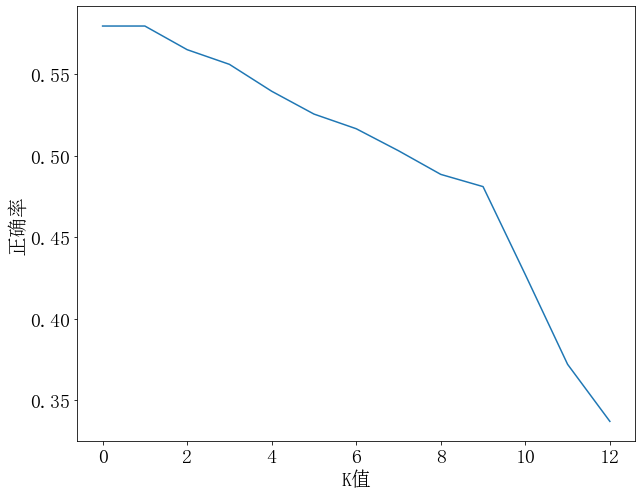

In [91]:
# 选取正确率均值最高的K
rateMean = np.mean(rate, axis=0)
for k, r in zip(K, rateMean.tolist()):  #tolist将numpy数组转换为列表
    print(f'K={k}, 正确率: {r:.2%}')
plt.figure(figsize=(10,8))
plt.plot(rateMean)
plt.xlabel('K值')
plt.ylabel('正确率')
plt.show()

In [92]:
# 这里K不能选取过小，否则容易过拟合
bestK = 4
print(f'K为{bestK}时，平均正确率较高{np.mean(rate, axis=0)[bestK-1]:.2%}')
for i in range(20):
    print(f'第{i+1:>3} 组类别，正确率: {rate[i][bestK]:.2f}')

K为4时，平均正确率较高55.60%
第  1 组类别，正确率: 0.43
第  2 组类别，正确率: 0.55
第  3 组类别，正确率: 0.51
第  4 组类别，正确率: 0.38
第  5 组类别，正确率: 0.55
第  6 组类别，正确率: 0.45
第  7 组类别，正确率: 0.42
第  8 组类别，正确率: 0.44
第  9 组类别，正确率: 0.67
第 10 组类别，正确率: 0.57
第 11 组类别，正确率: 0.70
第 12 组类别，正确率: 0.62
第 13 组类别，正确率: 0.51
第 14 组类别，正确率: 0.57
第 15 组类别，正确率: 0.56
第 16 组类别，正确率: 0.50
第 17 组类别，正确率: 0.56
第 18 组类别，正确率: 0.72
第 19 组类别，正确率: 0.43
第 20 组类别，正确率: 0.65


# 朴素贝叶斯


## 1.导入库

In [389]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer  #特征提取模块，导入TF-idf
from sklearn.naive_bayes import MultinomialNB  #采用多项式朴素Bayes
from sklearn import metrics

In [426]:
train_x, train_y = [], []
test_x, test_y = [], []
tmp = [w for words in test_words for w  in words]
cnt = 0
for i in range(20):
    for w in test_words[i]:  # 测试集
        test_x+=w  
        test_y.append(i)
    for w in words[i]:  # 训练集
         if w not in tmp:  # 训练集元素不能在测试集中出现
            train_x+=w
            train_y.append(i)
    else:
        cnt += 1
train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)
print(f'训练集大小{train_x.shape}, 测试集大小{test_y.shape}')


训练集大小(2512857,), 测试集大小(2000,)


In [427]:
len(train_y)

17835

In [429]:
#计算单词权重
tf=TfidfVectorizer(max_df=0.5)  #tf代表词频，单词在50%的文本中都出现过，那么它携带很少信息
train_features=tf.fit_transform(train_x)
test_features=tf.transform(test_x)

In [431]:
len(train_x)

2512857

In [432]:
#构建模型
clf= MultinomialNB(alpha=1)
#训练模型
clf.fit(train_features,train_y)
predicted_label=clf.predict(test_features)  

ValueError: Found input variables with inconsistent numbers of samples: [2512857, 17835]

In [ ]:
print('准确率:',metrics.accuracy_score(test_y,predicted_label))  #与预测结果进行比对

## 前馈神经网络

构建测试集与训练集

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

In [ ]:
train_x, train_y = [], []
test_x, test_y = [], []
tmp = [w for words in test_words for w  in words]
cnt = 0
for i in range(20):
    for w in test_words[i]:  # 测试集
        x = word2vector(w)
        test_x.append(x)
        test_y.append(i)
    for w in words[i]:  # 训练集
        if w not in tmp:  # 训练集元素不能在测试集中出现
            x = word2vector(w)
            train_x.append(x)
            train_y.append(i)
        else:
            cnt += 1
train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)
print(f'训练集大小{train_x.shape}, 测试集大小{test_y.shape}')

In [ ]:
# 构建为tf.data.Dataset数据类型
train = tf.data.Dataset.from_tensor_slices((train_x, train_y))
train = train.shuffle(10000).batch(16).repeat(5)  # 随机打乱，batch大小为16，重复5次，即每次训练17835*5=89175个数据
test = tf.data.Dataset.from_tensor_slices((test_x, test_y))

In [ ]:
model = keras.Sequential([
    layers.Dense(32, activation='sigmoid', input_shape=[N,]),
    layers.Dense(20, activation='softmax')
])
model.compile(optimizer='adam',
             loss = keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
history = model.fit(train, epochs=20, validation_data=(test_x, test_y))

In [ ]:
# plt.figure(figsize=(10, 5))
labels = ['loss', 'accuracy', 'val_accuracy']
name = ['损失', '训练集准确率', '验证集准确率']
for i, l in enumerate(labels):
    plt.plot(history.history[l], label=name[i])
plt.xlabel('训练次数')
plt.ylabel('准确率')
plt.legend()
plt.show()

In [ ]:
pred = model.predict(test_x)
print(f'验证集上最终的准确率: {np.sum(np.argmax(pred, axis=1) == test_y) / np.size(test_y)}')